# Sampling from a Distribution

The goal of this notebook is to thoroughly explain the concept of sampling from a distribution, as discussed in the StatQuest video titled '43_Sampling from a Distribution, Clearly Explained!!!'.

## What is Sampling from a Distribution?

In statistics, we often deal with distributions which are basically functions that describe the probabilities of potential outcomes. When we take a 'sample from a distribution', it means we use a computer to pick a random number based on the probabilities described by the distribution.

For instance, if we have a histogram or a curve representing a distribution of people's heights, sampling from this distribution means asking the computer to randomly pick a height based on the probabilities implied by our histogram or curve. The computer is more likely to pick a number near the middle of the distribution (where the histogram or curve is tallest) because most people's heights are around the average. However, every now and then, the computer might pick a number from the edges of the distribution (where the histogram or curve is shortest), representing an unusually short or tall person.

## Why do we Sample from a Distribution?

Sampling from a distribution allows us to explore statistics and perform statistical tests. We can generate a large number of samples and use them in statistical tests to see what happens. Since we know the original distribution, we can compare our expectations to the actual results. This can help us understand the capabilities of our statistical tests, and whether we need to adjust them or collect more data.

For example, if we have two samples from a single distribution, we can use a t-test to compare them. Since the samples are from the same distribution, we expect the t-test to give us a large p-value, indicating that the samples are not significantly different. If we repeat this process many times, we can get a sense of how often the t-test gives us the expected result.

Similarly, if we have samples from two different distributions, the t-test should give us a small p-value, indicating that the samples are significantly different. Again, by repeating this process many times, we can see how often the t-test works as expected.

In summary, sampling from a distribution lets us determine the capabilities of a statistical test without having to do much real work. It is a powerful tool for statistical exploration and testing.

## Sampling from a Distribution in Python

To illustrate, let's create a normal distribution and then draw samples from it using Python's numpy library. We can then plot the original distribution and the samples to see how well they match.

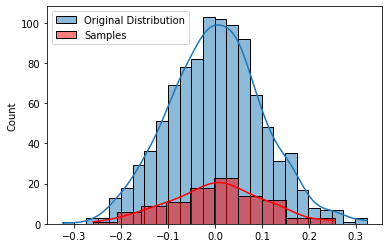

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters for the normal distribution
mu, sigma = 0, 0.1

# Create a normal distribution
s = np.random.normal(mu, sigma, 1000)

# Draw 100 samples from the distribution
samples = np.random.choice(s, 100)

# Plot the original distribution
sns.histplot(s, kde=True, label='Original Distribution')

# Plot the samples
sns.histplot(samples, kde=True, color='red', label='Samples')
plt.legend()
plt.show()

The red distribution represents the samples and, as you can see, it closely follows the shape of the original distribution (shown in blue), but with a bit more noise due to the randomness of the sampling process.

## Sampling from a Distribution and T-tests

As mentioned before, one of the primary uses of sampling from a distribution is to perform hypothesis tests, such as a t-test. Let's demonstrate this by drawing two samples from the same distribution and performing a t-test on them. Since the samples are from the same distribution, we would expect the t-test to give us a large p-value, indicating that the samples are not significantly different.

In [2]:
from scipy import stats

# Draw two samples from the same distribution
sample1 = np.random.choice(s, 100)
sample2 = np.random.choice(s, 100)

# Perform a t-test on the samples
t_stat, p_value = stats.ttest_ind(sample1, sample2)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: 1.2400416779386303
P-value: 0.21642753617956748


As expected, the p-value is large, indicating that the samples are not significantly different. This is consistent with our expectation since both samples were drawn from the same distribution.

T-statistic: -11.83825248374263
P-value: 8.512656603388573e-25


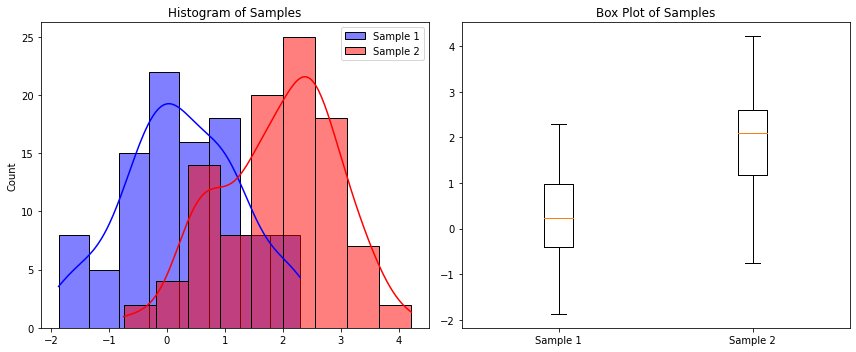

In [8]:
# Create two normal distributions with different means
s1 = np.random.normal(0, 1, 1000)  # mean=0, std=1
s2 = np.random.normal(2, 1, 1000)  # mean=2, std=1

# Draw samples from each distribution
sample1 = np.random.choice(s1, 100)
sample2 = np.random.choice(s2, 100)

# Perform t-test
t_stat, p_value = stats.ttest_ind(sample1, sample2)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot histograms
sns.histplot(data=sample1, kde=True, color='blue', label='Sample 1', ax=ax1)
sns.histplot(data=sample2, kde=True, color='red', label='Sample 2', ax=ax1)
ax1.set_title('Histogram of Samples')
ax1.legend()

# Create box plot
data = [sample1, sample2]
ax2.boxplot(data, labels=['Sample 1', 'Sample 2'])
ax2.set_title('Box Plot of Samples')

plt.tight_layout()
plt.show()


## Conclusion

Sampling from a distribution is a fundamental concept in statistics that allows us to perform hypothesis testing and understand the properties and capabilities of our statistical tests. It involves generating a set of random numbers that reflect the probabilities of a given distribution. The samples can then be used in various statistical tests to compare the expected and actual results.

In this notebook, we have illustrated how to sample from a distribution using Python's numpy library and how to perform a t-test on the samples using scipy's stats library. We have also shown that the results of the t-test align with our expectations based on the underlying distributions of the samples.